# Robust Statistics

In [2]:
from scipy.stats import multivariate_normal as mvn
import scipy.stats as stats
import pylab
import numpy as np
import pandas as pd
import statsmodels.api as sm
import mplfinance as fplt
import math
from matplotlib import pyplot as plt
import scipy
import BarSampler as bs
def get_log_return(df):
    log_returns = pd.Series(np.log((df['close'] - df['open'])/df['open'] + 1),name='log returns')
    return pd.concat([df,log_returns], axis=1)

## Robust scale estimators

We say a scale estimator $S$ is Fisher consistent if and only if
$$S(F_{\sigma}) = \sigma$$
for all $\sigma >0$.

Here are some scale estimators for the sample $X_n = \{x_1,\ldots,x_n\}$ 
<br> **Standard Deviation**: this is not robust

<br> **Interquartile range**:
$$IQR(X_n) = x_{(n-[n/4]+1)}-x_{[n/4]}$$
One thing to note about the interquartile range is that it is not consistent for the model $\mathcal{N}(0,\sigma^2)$. In this case we have 
$$IQR(F_{\sigma})= 2 \Phi^{-1}(0.75)\sigma \neq \sigma$$

This leads to the
<br>**Normalized Interquartile Range**:
$$IQRN(X_n)= \frac{1}{2 \Phi^{-1}(0.75)}IQR(X_n)$$

Here $\frac{1}{2 \Phi^{-1}(0.75)}=0.7413$ is called the consistency factor.

**Median Absolute Deviation**:
$$MAD(X_n) = med_i(|x_i-med(X_n)|)$$
This has to be normalized for the normal model as well
$$MADN(X_n) = \frac{1}{\Phi^{-1}(0.75)}MAD(X_n) = 1.4826MAD(X_n)$$

**$Q_n$ estimator**:

$$Q_n(X_n) = 2.219\{|x_i-x_j|;i < j\}_{(k)}$$

where $k = \frac{{n}\choose{2}}{4}$

This is a particularly important estimator since 
1. It has a 50% breakdown value
2. It does not need an initial estimate of location
3. It can be computed in $O(nlogn)$ time

|estimator|breakdown|efficiency|
|---------|---------|----------|
|Std|0%|100%|
|IQRN|25%|37%|
|MADN|50%|37%|
|Qn|50%|82%|

We will now make the same maximum likelihood argument for scale estimators which we did for location estimators. Since we are working with a pure scale family we have
$$\begin{array}{lcr}
\hat{\sigma}_{MLE}& = & max_{\sigma}\prod_{i=1}^n \frac{1}{\sigma}f(\frac{x_i}{\sigma})\\
 & = & max_{\sigma}\sum_{i=1}^n -log(\sigma) + logf(\frac{x_i}{\sigma})
 \end{array}$$

Now we take the derivative with respect to $\sigma$ and set equal to zero to get
$$\begin{array}{lcr}
\sum_{i=1}^n \{-\frac{1}{\sigma} + \frac{f'(\frac{x_i}{\sigma})}{f(\frac{x_i}{\sigma})}\frac{-x_i}{\sigma^2}\}&=&0\\
\sum_{i=1}^n \frac{f'(\frac{x_i}{\sigma})}{f(\frac{x_i}{\sigma})}\frac{-x_i}{\sigma}&=&n\\
\frac{1}{n}\sum_{i=1}^n -\frac{x_i}{\sigma}\frac{f'(\frac{x_i}{\sigma})}{f(\frac{x_i}{\sigma})}&=&1
\end{array}$$

We rewrite the last expression as
$$\frac{1}{n}\sum_{i=1}^n \rho (\frac{x_i}{\sigma}) = 1$$

with
$$\rho(t) = -t\frac{f'(t)}{f(t)}$$

In the case of a normal distribution we have $f=\phi$ and $\rho(t) = t^2$ which gives
$$\hat{\sigma}_{MLE}=\sqrt{\sum_{i=1}^n \frac{x_i^2}{n}}$$

Which is known as the root mean square.

Similar to what we did for the location parameter we will generalize this approach and use it to define M-estimators of scale. Let $\rho(x)$ be an even function which is non-decreasing in $|x|$, with $\rho(0)=0$. An M-estimator of scale, $\hat{\sigma}_M$, satifies 
$$\frac{1}{n}\sum_{i=1}^n\rho\left(\frac{x_i}{\hat{\sigma}_M}\right) = \delta$$

where $\delta$ is a constant which can be chosen to achieve various objectives. One way to pick $\delta$ is to set 
$$\delta = \int \rho(t)dF(t)$$
in order to guarantee Fisher efficiency. $\delta$ can also be used to control the breakdown value of the estimator. For any M-estimator of scale we have
$$\epsilon^*(\hat{\sigma}_M) = min(\frac{\delta}{\rho(\infty)},1-\frac{\delta}{\rho(\infty)})$$

If $\rho$ is unbounded that the breakdown value if 0%,by picking $\delta = \frac{\rho(\infty)}{2}$ you achieve a breakdown value of 50%.

The influence function is given by 
$$IF(x,T,F) = \frac{\rho(x) - \delta}{\int y \rho'(y)dF(y)}$$

For M-estimators of scale we also have asymptotic normality with variance given by
$$V(T,F) = \int IF(x,T,F)^2dF(x)$$

and of course the Cramer-Rao bound is satisfied 
$$V(T,F) \geq \frac{1}{I(F)}$$

In the case of the pure scale model the Fisher information is given by
$$I(F) = \int \left(-1-x\frac{f'(x)}{f(x)}\right)^2dF(x)$$

Many of the popular choices for $\rho$ which we saw in the location case can be applies to the scale case. For example

**Huber**: $\rho_b(x) = \left\{
  \begin{array}{lcr} 
      \frac{x^2}{2} & if & |x| \leq b \\
      b|x| - \frac{b^2}{2} & if & |x| > b 
      \end{array}
      \right.$

**Tukey's bisquare**: $\rho_c(x) = \left\{
  \begin{array}{lcr} 
      \frac{x^2}{2}-\frac{x^4}{2c^2}+\frac{x^6}{6c^4}  & if & |x| \leq c \\
      \frac{c^2}{6} & if & |x| > c 
      \end{array}
      \right.$

The bisquare function is a popular choice. Setting $c = 1.547$ will give a breakdown value of 50%.

## Location-scale estimation

For the final univariate case we move on to the general location-scale family. This has the form
$$F_{(\mu,\sigma)}(x) = F \left(\frac{x - \mu}{\sigma}\right)$$

where the location parameter $\mu$ is in the range $-\infty < \mu < \infty$ and the scale parameter $\sigma$ is strictly positive. Here, of course, we assume that both $\mu$ and $\sigma$ are unknown and samples are iid. 

The denisty will have the form
$$f_{(\mu,\sigma)}(x) = \frac{1}{\sigma}f\left(\frac{x- \mu}{\sigma}\right)$$

One approach to fitting these models is to use the location and scale estimators we have already discussed for the pure location and pure scale models. There are draws backs to this. For example consider the M-estimator of location
$$\hat{\mu}_M = max_{\mu}\sum_{i=1}^n \rho(x_i - \mu)$$

This typically will not be scale equivariant. Consider $\rho(x) = x^2$ and $c$ some scale, then
$$\hat{\mu}_M(cx) = max_{\mu}\sum_{i=1}^n (c(x_i - \mu))^2=c^2 max_{\mu}\sum_{i=1}^n (x_i - \mu)^2 \neq c \hat{\mu}_M(x)$$

We can make this scale equivariant using
$$\hat{\mu}_M = max_{\mu}\sum_{i=1}^n \rho\left(\frac{x_i - \mu}{\hat{\sigma}}\right)$$

Where $\hat{\sigma}$ is some estimate of scale. When choosing an estimator for $\hat{\sigma}$ the rule of thumb is to pick something with a high breakdown value. This is because the breakdown value of $\mu_M$ will depend on the breakdown value of $\hat{\sigma}$.

### Algorithms for M-estimators

We give some algorithms for the computation of M-estimators. Let us start with M-estimators of location. Consider the estimator given above.
$$\hat{\mu}_M = max_{\mu}\sum_{i=1}^n \rho\left(\frac{x_i - \mu}{\hat{\sigma}}\right)$$
We begin by computing a robust estimate of scale, say $Q_n$.

We will define a weight function based on the score $\psi = \rho'$
$$W(x) = \left\{
\begin{array}{lcr}
\frac{\psi(x)}{x} & if & x \neq 0\\
\psi'(x) & if & x=0
\end{array}\right.$$

Now recall the estimating equation
$$\sum_{i=1}^n \psi\left(\frac{x_i - \hat{\mu}_M}{\hat{\sigma}}\right)=0$$

where $\hat{\sigma}$ is our robust estimate of scale. We will rewrite this estimator in terms of the weight function as
$$\sum_{i=1}^n\left(\frac{x_i - \hat{\mu}_M}{\hat{\sigma}}\right) W\left(\frac{x_i - \hat{\mu}_M}{\hat{\sigma}}\right)=0$$

In order to estimate we need to solve this for $\hat{\mu}_M$. To this end let's call $w_i = W\left(\frac{x_i - \hat{\mu}_M}{\hat{\sigma}}\right)$. We now reexpress the above equation as
$$\hat{\mu}_M = \frac{\sum_{i=1}^n w_ix_i}{\sum_{i=1}^n w_i}$$

This is a step in the right direction, but we still have the issue that this is an implict equation where $w_i$ depends on $\hat{\mu}_M$. In order to address this problem we use an iterative algorithm.

1. Start with an initial estimate of location, for example $\hat{\mu}_0 = med(X_n)$
2. For each $k = 0, 1, \ldots, $termination set $$W_{k,i} = W\left(\frac{x_i - \hat{\mu}_k}{\hat{\sigma}}\right)$$
3. Compute $$\hat{\mu}_{k+1} = \frac{\sum_{i=1}^n w_{k,i}x_i}{\sum_{i=1}^n w_{k,i}}$$
4. Stop when $|\hat{\mu}_{k+1} - \hat{\mu}_k|< \epsilon \hat{\sigma}$ for some choice of $\epsilon$

This is a form of iteratively weighted least squares. If our M-estimator is monotone then this will converge to a unique solution.

Another approach is called the **one-step M-estimator**. The idea is to apply on step of Newton's interative process to the following system of equations
$$\sum_{i=1}^n \psi\left(\frac{x_i - \hat{\mu}_M}{\hat{\sigma}}\right)=0$$
$$\sum_{i=1}^n \chi\left(\frac{x_i - \hat{\mu}_M}{\hat{\sigma}}\right)=0$$

where $\chi(x) = \psi^2(x) - \int \psi^2(u)dF(u)$

If we let $\hat{\mu}_0$ and $\hat{\sigma}_0$ be your initial estimates of location and scale. A typical choice is the median and $Q_n$. Applying one step of Newton yields
$$\hat{\mu}_1 = \hat{\mu}_0 + \frac{\frac{1}{n}\sum_{i=1}^n \psi\left(\frac{x_i - \hat{\mu}_0}{\hat{\sigma}_0}\right)}{\frac{1}{n}\sum_{i=1}^n \psi'\left(\frac{x_i - \hat{\mu}_0}{\hat{\sigma}_0}\right)}\hat{\sigma}_0$$

These same estimation algorithms can be used to do scale estimation in the same way.

## Multivariate Techniques

The multivariate approach to robust statistics is different from the approach used in the univariate case. Given a multivariate data set $\pmb{x}_1 , \ldots, \pmb{x}_n$ of p-dimensional vectors we will combine them into a data matrix
$$\pmb{X} = (\pmb{x}_1 , \ldots, \pmb{x}_n)^T =
\begin{pmatrix}
x_{11} & x_{12} & \cdots & x_{1p}\\
\vdots & \vdots & &\vdots\\
x_{n1} & x_{n2} & \cdots &x_{np}
\end{pmatrix}$$

Of course people will choose the model
$$\pmb{x}_i \sim \mathcal{N}(\pmb{\mu},\pmb{\Sigma})$$

but we want to consider broader models as well, especially in finance.

### Spherical Distributions

Let $\pmb{x} \in \mathbb{R}^p$ be a random vector. We say that $\pmb{x}$ is spherically distributed and write $\pmb{x} \sim \mathcal{S}_p(\phi)$ if
$$\pmb{x} \sim A\pmb{x}$$
for all $A \in O(p)$. This says that a random vector is spherically distributed if it is invariant under an action of the orthogonal group i.e. rotations. Well this is a nice fact to know in practice it is impractical to check this condition. The following result helps us characterize spherical random variables in a way that makes them easy to identify.

**Theorem**- A random vector $\pmb{x} \in \mathbb{R}^p$ is spherically distributed  $\pmb{x} \sim \mathcal{S}_p(\phi)$ if and only if it's characteristic function $\psi_{\pmb{x}}(\pmb{t})$ satisfies one of the following conditions
1. $\psi_{\pmb{x}}(\pmb{t}) = \phi(\pmb{t}^T\pmb{t})$ for some scalar function $\phi$ called the characteristic generator.
2. $\psi_{\pmb{x}}(\pmb{t})=\psi_{A\pmb{x}}(\pmb{t})$ for all $A \in O(p)$.

For example let's take $\pmb{x} \sim \mathcal{N}(0,\sigma^2 \pmb{I})$. This has characteristic function
$$\psi_{\pmb{x}}(\pmb{t}) =exp\left(-\frac{1}{2}\sigma^2 \pmb{t}^T\pmb{t}\right)=exp\left(-\frac{1}{2}\sigma^2 u\right)$$

which shows that 
$$\psi_{\pmb{x}}(\pmb{t}) = \phi(\pmb{t}^T\pmb{t})$$

with
$$\phi(u)=exp\left(-\frac{1}{2}\sigma^2 u\right)$$

We see the theorem shows this is a spherical distribution. It's the covariance structure that's driving this.

(-3.0, 3.0, -3.0, 3.0)

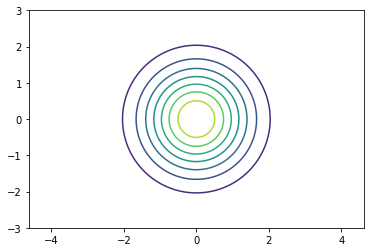

In [25]:
D = 2
x = np.random.rand(D)
mu = np.array([0,0])
A = np.random.rand(D,D)
# random symmetric matrix
cov = np.array([[1,0],[0,1]])

# Generate grid points
x, y = np.meshgrid(np.linspace(-3,3,100),np.linspace(-3,3,100))
xy = np.column_stack([x.flat, y.flat])

# density values at the grid points
Z = mvn.pdf(xy, mu, cov).reshape(x.shape)

plt.contour(x, y, Z)
plt.axis('equal')

### Elliptical Distributions

Let $\pmb{x} \in \mathbb{R}^p$ be a random vector. We say that $\pmb{x}$ is elliptically distributed and write $\pmb{x} \sim E_p(\pmb{\mu},\pmb{\Sigma},\phi)$ if
$$\pmb{x} \sim \pmb{\mu} + A^T\pmb{y}$$
$\pmb{y} \sim \mathcal{S}_k(\phi)$, $A \in \mathbb{R}^{k \times p}$, and $\pmb{\Sigma} = A^TA$. 

An elliptically distributed random variable is just an affine transformation of a spherically distributed random variable. If we know the underlying characteristic generator $\phi$ of the distribution we can compute it's characteristic function using
$$\psi_{\pmb{x}}(\pmb{t}) = e^{i \pmb{t}^T \pmb{\mu}} \phi(\pmb{t}^T \pmb{\Sigma} \pmb{t})$$

It is important to note that $\Sigma$ is not necessarily the covariance matrix of the distribution, but it a scaling of it
$$Cov(\pmb{x}) = -\frac{\partial\psi(0)}{\partial t} \pmb{\Sigma}$$

Of course every distribution has a characteristic function, but it can be difficult to work with. It would be better to work with the PDF, however this does not always exist. We have the following result that guarantees us the existence of the PDF.

**Theorem**-If the characteristic function $\psi_{\pmb{x}}(\pmb{t})$ is integrable, then the CDF is absolutely continuous, and therefore $\pmb{x}$ has a PDF given by
$$f(\pmb{x}) = \frac{1}{(2 \pi)^n}\int_{\mathbb{R}^n}e^{-i \pmb{t}\pmb{x}}\psi_{\pmb{x}}(\pmb{t})d\pmb{t}$$

Once we know of the existence of the PDF we can use it to define an elliptical distribution
$$f(\pmb{x}) = \frac{c_n}{\sqrt{|\pmb{\Sigma}|}}\phi \left[(\pmb{x} - \pmb{\mu})^T \pmb{\Sigma}(\pmb{x} - \pmb{\mu}) \right]$$

$\pmb{x} \in \mathbb{R}^n$, $c_n$ is the normalization constant, and $\phi:[0,\infty)\rightarrow[0,\infty)$ is a generator function satisfying
$$g_n=\int_0^{\infty} \pmb{x}^{n/2-1}\phi(\pmb{x})d\pmb{x} < \infty$$

The value of the normalizing constant $c_n$ is computed from $g_n$ by
$$c_n = \frac{\Gamma(n/2)}{\pi^{n/2}}\int_0^{\infty} \pmb{x}^{n/2-1}\phi(\pmb{x})d\pmb{x} < \infty$$

Again the covariance structure drives this.

(-2.253084482554306,
 3.4506084604296765,
 -1.8658714850852012,
 2.2535960780959434)

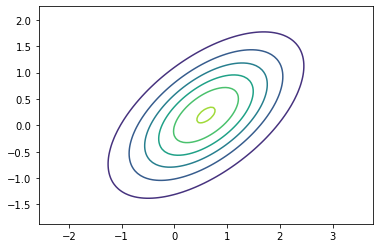

In [24]:
D = 2
x = np.random.rand(D)
mu = np.random.rand(D)
A = np.random.rand(D,D)
# random symmetric matrix
cov = A.T.dot(A)

# Generate grid points
x, y = np.meshgrid(np.linspace(mu[0]-3*cov[0][0],mu[0]+3*cov[0][0],100),np.linspace(mu[1]-3*cov[1][1],mu[1]+3*cov[1][1],100))
xy = np.column_stack([x.flat, y.flat])

# density values at the grid points
Z = mvn.pdf(xy, mu, cov).reshape(x.shape)

plt.contour(x, y, Z)
plt.axis('equal')

As we can see starting from a spherical distribution we get an elliptical distribution. A large number of familiar multivariate distributions are of the elliptical class: normal, Cauchy, student-t, stable, etc....

### Classical Estimators

Typically we want estimators $\hat{\pmb{\mu}}$ and $\hat{\pmb{\Sigma}}$ which are **affine equivariant**. This means
$$\hat{\pmb{\mu}}(A\pmb{x}_1+\pmb{b},A\pmb{x}_2+\pmb{b},\ldots, A\pmb{x}_n+\pmb{b})=A\hat{\pmb{\mu}}(\pmb{x}_1,\pmb{x}_2,\ldots, \pmb{x}_n)+\pmb{b}$$
$$\hat{\pmb{\Sigma}}(A\pmb{x}_1+\pmb{b},A\pmb{x}_2+\pmb{b},\ldots, A\pmb{x}_n+\pmb{b})=A\hat{\pmb{\Sigma}}(\pmb{x}_1,\pmb{x}_2,\ldots, \pmb{x}_n)A^T$$

Affine equivariance implies that the estimator transforms well under any non-singular reparametrization of the sample space. Consequently, the data might be rotated, translated or rescaled (for example through a change of measurement units) without affecting the outlier detection diagnostics.

The classical estimators for $\pmb{\mu}$ and $\pmb{\Sigma}$ are the sample mean and covariance matrix
$$\pmb{\bar{x}} = \frac{1}{n}\sum_{i=1}^n \pmb{x}_i$$
$$\pmb{S}_n = \frac{1}{n-1}\sum_{i=1}^n (\pmb{x}_i-\pmb{\bar{x}})(\pmb{x}_i-\pmb{\bar{x}})^T$$

Both are affine equivariant but highly sensitive to outliers, as they have: zero breakdown value
unbounded influence function.

In order to detect outliers using the classical techniques we use what is refered to as a tolerance ellipsoid. This is computed using the **Mahalanobis Distance**
$$MD(\pmb{x}_i) = \sqrt{(\pmb{x}_i-\pmb{\bar{x}})^T \pmb{S}_n^{-1}(\pmb{x}_i-\pmb{\bar{x}})}$$

The classic 97.5% tolerance ellipsoid is given by
$$\{\pmb{x} | MD(\pmb{x}) \leq \sqrt{\chi^2_{p,0.975}}\}$$

with $\chi^2_{p,0.975}$ the 97.5% quantile of the chi squared distribution with $p$ degrees of freedom. We expect for a large number of observations 97.5% of the data to fall in this range.

Of course the non-robustness of the estimates involved in the Mahalanobis distance will cause the same outlier detection issues we saw in the univariate case. To combat this we develop the notions on M-estimators of location and scatter for multivariate models. We take the same approach by generalizing maxiumu likelihood. In the case of the normal model the maxiumum likelihood esitmates are given by
$$\sum_{i=1}^n (\pmb{x}_i - \hat{\pmb{\mu}})=0$$
and
$$\frac{1}{n}\sum_{i=1}^n (\pmb{x}_i - \hat{\pmb{\mu}})(\pmb{x}_i - \hat{\pmb{\mu}})^T = \hat{\pmb{\Sigma}}$$

An M-estimator $(\hat{\pmb{\mu}},\hat{\pmb{\Sigma}})$ is a solution of
$$\sum_{i=1}^nW_1(d_i^2) (\pmb{x}_i - \hat{\pmb{\mu}})=0$$
$$\frac{1}{n}\sum_{i=1}^nW_2(d_i^2) (\pmb{x}_i - \hat{\pmb{\mu}})(\pmb{x}_i - \hat{\pmb{\mu}})^T = \hat{\pmb{\Sigma}}$$

where $d_i = \sqrt{(\pmb{x}_i-\pmb{\bar{x}})^T \hat{\pmb{\Sigma}}^{-1}(\pmb{x}_i-\pmb{\bar{x}})}$

Here we must choose the function $W_1$ and $W_2$. In order to ensure existence, uniqueness, and consistantcy we must have certian conditions on $W_1$ and $W_2$. For example we want $\sqrt{t}W_1(t)$ and $tW_2(t)$ to be bounded. 

You can broadly split M-estimators into two categories. When $tW_2(t)$ is weakly increasing the estimator is called *monotone*, otherwise it is called *redescending*.

We can use an iterative procedure as seen earlier to compute these estimators. 
1. Pick inital estimate $\hat{\pmb{\mu}}_0$ and $\hat{\pmb{\Sigma}}_0$
2. At step $k$ compute $d_{ik} = \sqrt{(\pmb{x}_i-\hat{\pmb{\mu}}_k)^T \hat{\pmb{\Sigma}}_k^{-1}(\pmb{x}_i-\hat{\pmb{\mu}}_k)}$
3. $\hat{\pmb{\mu}}_{k+1} = \frac{\sum_{i=1}^n W_1(d^2_{ki})\pmb{x}_i}{\sum_{i=1}^n W_1(d^2_{ki})}$
4. $\hat{\pmb{\Sigma}}_{k+1} = \frac{1}{n}\sum_{i=1}^n W_2(d^2_{ki})(\pmb{x}_i -\hat{\pmb{\mu}}_{k+1})(\pmb{x}_i -\hat{\pmb{\mu}}_{k+1})^T$

If the estimator is monotone this converges to a unique solution independent of the initial values. If the estimator is redescending you can converge to a bad solution.

Some of the properties of M-estimators in the multivariate case are
1. Under mild regulatiry conditions on $W_1$ adn $W_2$ these are asymptotically normal
2. The influence function is bounded if $\sqrt{t}W_1(t)$ and $tW_2(t)$ are bounded
3. $\epsilon^* \leq \frac{1}{p+1}$

Note that unlike the univariate case were M-estimators will have a breakdown value of 50%, this is no longer true in the multivariate case. If the estimator is monotone it typically has a low break down values, but is eay to compute. IF the estimator is redescending them you can achieve a high breakdown value at the cost of sensitivity to initial conditions.

### Stahel-Donoho

The Stahel-Donoho outlyingness of $\pmb{x}$ relative to the data set $\{\pmb{x}_1, \ldots, \pmb{x}_n\}$ is given by
$$SDO(\pmb{x}) = sup_{\pmb{a} \in \mathcal{R}^p}\frac{|\pmb{a}^T\pmb{x} - med_i(\pmb{a}^T\pmb{x}_i)|}{MAD_i(\pmb{a}^T\pmb{x}_i)}$$

This projects the data set in many directions $\pmb{a}$. 

The projected data are univariate, so we can compute the outlyingness of $\pmb{a}^T\pmb{x}$
as its ‘absolute robust z-score’ relative to $\{\pmb{a}^T\pmb{x}_1, . . . , \pmb{a}^T\pmb{x}_n\}$ 

The final outlyingness is the maximum of the univariate one over all directions.

The **Stahel-Donoho estimator** is defined as the weighted mean and covariance matrix of the $\pmb{x}_i$ with weights $\pmb{w}_i = W(SDO_i)$ where the weight function $W$ is a bounded, strictly positive and weakly decreasing function.

A typical weight function is
$$W(t) = min\left(1, \frac{\chi^2_{p,0.95}}{t^2}\right)$$

If $t^2W(t)$ is bounded (like here) the breakdown value of the Stahel-Donoho estimator is 50%. It was the first affine equivariant estimator of location and scatter with maximal breakdown value.

In the formula of the outlyingness $SDO_i$ also other estimators of univariate location and scale can be used, such as M-estimators of location and scale.

The IF is bounded when using M-estimators of location and scale with bounded and monotone $\psi$ and $\rho$ functions.

To compute the Stahel-Donoho estimator, the number of directions $\pmb{a}$ needs to be restricted to a finite set. These can be obtained by subsampling: take the directions orthogonal to hyperplanes spanned by random subsamples of size $p$. This yields an affine equivariant algorithm.

### MCD

The MCD estimator (Rousseeuw, 1984) is an often used high-breakdown and affine equivariant estimator of location and scatter:
For fixed $h$, with $[n + p + 1]/2 􏰜\leq h \leq􏰜 n$

1. $\hat{\pmb{\mu}}_0$ is the mean of the $h$ observations for which the determinant of the sample covariance matrix is minimal.
2. $\hat{\pmb{\Sigma}}_0$ is the covariance matrix of that subset multiplied by a consistency factor

The MCD estimator can only be computed when $h > p$, otherwise the covariance matrix of any $h$-subset will be singular. This condition is certainly satisfied when $n \geq 􏰝 2p$. It is however recommended that $n \geq􏰝 5p$.

One approach to the minimum covariance determinant estimator was proposed by Rousseeuw P.J., and LeRoy A.M. (1987). A practical approach to the computation of this estimator is the Fast MCD algorithm developed in Rousseeuw and Van Driessen (1999). Let n be the size of the data set and p the number of variables in the data set. The goal of the Fast MCD algorithm is to find a subset of the data of size h who's covariance matrix has the minimum determinant. As shown in Lopuhaa H.P., and Rousseeuw P.J. (1991) the finite breakdown value of the MCD estimator is $(n-h+1)/n$ where h is chosen so that $[n+p+1]/2\leq h\leq n$. This allows the user to choose $h$ in order to establish a tradeoff between the amount of data included in the computation and the level of robustness desired. Below we outline the Fast MCD algorithm and provide code for it's implementation. The steps of Fast MCD are as follows.